TWO WAY ANOVA

In [1]:
import pandas as pd

In [3]:
df

,gender,Age,Height,preweight,Diet,weight6weeks
0,Female,22,159,58,1,54.2
1,Female,46,192,60,1,54.0
2,Female,55,170,64,1,63.3
3,Female,33,171,64,1,61.1
4,Female,50,170,65,1,62.2
...,...,...,...,...,...,...
71,Male,35,183,83,3,80.2
72,Male,49,177,84,3,79.9
73,Male,28,164,85,3,79.7
74,Male,40,167,87,3,77.8


In [8]:
df["wtloss"]=df["preweight"]-df["weight6weeks"]

In [9]:
df

,gender,Age,Height,preweight,Diet,weight6weeks,wtloss
0,Female,22,159,58,1,54.2,3.8
1,Female,46,192,60,1,54.0,6.0
2,Female,55,170,64,1,63.3,0.7
3,Female,33,171,64,1,61.1,2.9
4,Female,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
71,Male,35,183,83,3,80.2,2.8
72,Male,49,177,84,3,79.9,4.1
73,Male,28,164,85,3,79.7,5.3
74,Male,40,167,87,3,77.8,9.2


In [10]:
import seaborn as sns

<Axes: xlabel='preweight', ylabel='Density'>

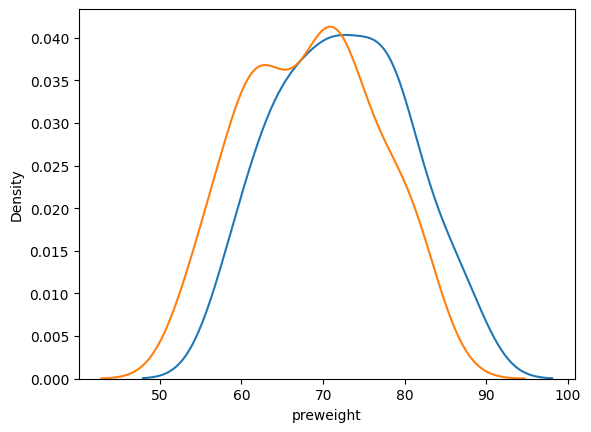

In [11]:
sns.kdeplot(df.preweight)
sns.kdeplot(df.weight6weeks)

<Axes: xlabel='Diet', ylabel='wtloss'>

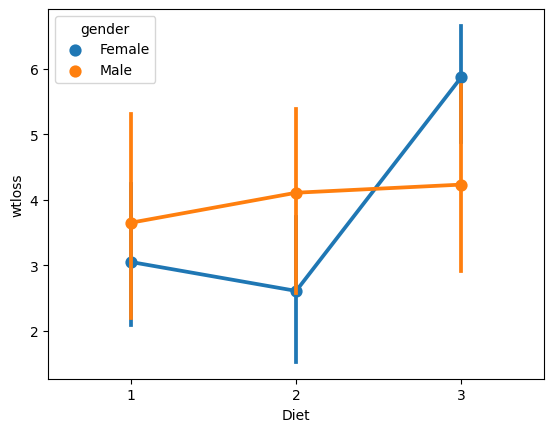

In [31]:
sns.pointplot(x="Diet",y="wtloss",hue="gender",data=df)

In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [14]:
formula="wtloss~C(gender)+C(Diet)"

In [16]:
model=ols(formula,df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,0.278485,0.278485,0.048877,0.825655
C(Diet),2.0,60.417220,30.208610,5.301912,0.007112
Residual,72.0,410.233112,5.697682,NaN,NaN


Conclusion:



1.   diet has impact on weight loss

1.   gender has no significant impact on weight loss






To identify which group is significantly different can make use of tukey


1.  Tukey's Honestly Significant Difference (HSD) test is a post-hoc test often used in conjunction with analysis of variance (ANOVA) to determine which group means differ significantly from each other. It helps identify specific pairwise differences between group means while controlling for Type I error rate.



In [19]:
from bioinfokit.analys import stat

In [20]:
a=stat()

In [21]:
a.tukey_hsd(df,res_var="wtloss",xfac_var=["gender","Diet"],anova_model=formula)
b=a.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:369: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:369: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:369: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

In [22]:
b

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Female, 1)","(Female, 2)",0.442857,-2.198556,3.084270,0.694190,0.900000
1,"(Female, 1)","(Female, 3)",2.830000,0.232983,5.427017,4.511936,0.024717
2,"(Female, 1)","(Male, 1)",0.600000,-2.293523,3.493523,0.858570,0.900000
3,"(Female, 1)","(Male, 2)",1.059091,-1.756665,3.874847,1.557362,0.870746
4,"(Female, 1)","(Male, 3)",1.183333,-1.565937,3.932604,1.782136,0.780674
5,"(Female, 2)","(Female, 3)",3.272857,0.675840,5.869874,5.217994,0.005583
6,"(Female, 2)","(Male, 1)",1.042857,-1.850666,3.936380,1.492276,0.896827
7,"(Female, 2)","(Male, 2)",1.501948,-1.313808,4.317704,2.208570,0.609790
8,"(Female, 2)","(Male, 3)",1.626190,-1.123080,4.375461,2.449093,0.513402
9,"(Female, 3)","(Male, 1)",2.230000,-0.623052,5.083052,3.236282,0.212300


In [25]:
result=b[b["p-value"]<0.05]

In [26]:
result

,group1,group2,Diff,Lower,Upper,q-value,p-value
1,"(Female, 1)","(Female, 3)",2.830000,0.232983,5.427017,4.511936,0.024717
5,"(Female, 2)","(Female, 3)",3.272857,0.675840,5.869874,5.217994,0.005583


Conclusion:



1.   female group who follows diet 2 and diet plan 3 are significantly different
2.   female group who follows diet 1 and diet plan 3 are significantly different



<Axes: xlabel='Diet', ylabel='wtloss'>

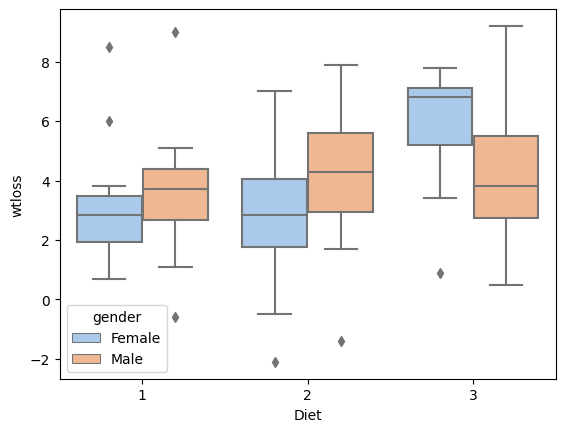

In [32]:
sns.boxplot(x="Diet",y="wtloss",hue="gender",data=df,palette="pastel")